<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Feature_Selection_Crenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')
sns.set_theme(style="darkgrid")

Mounted at /content/gdrive


# EDA

El dataset es de clasificación de celulares.
[Set de datos](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

### Columnas:
- **battery_power** : Total de mAh de la batería.
- **blue** : Si tiene Bluetooth o no.
- **clock_speed** : Velocidad del microprocesador.
- **dual_sim** : Si tiene soporte de dual-SIM.
- **fc** : Megapizels cámara frontal.
- **four_g** : Soporte 4G.
- **int_memory** : Memoria interna en Gb.
- **m_dep** : Profundidad en CM.
- **mobile_wt** : Peso.


In [ ]:
df_train : pd.DataFrame = pd.read_csv("/content/sample_data/train.csv")
df_test : pd.DataFrame = pd.read_csv("/content/sample_data/test.csv")
df_train.sample(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
101            1732     1          1.1         0   4       1          12   
220             850     1          1.6         1   6       1          29   
781            1368     0          3.0         1  10       0          50   
1888           1544     0          2.4         0  18       1          12   
1181           1271     0          1.5         1   0       0           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
101     0.8        119        8  ...        824       881  1308    16     7   
220     0.5        133        5  ...        404       642   593    19    17   
781     0.2         97        7  ...        698       829  2496    13     6   
1888    0.1        186        7  ...        470       844   489     9     4   
1181    0.9        161        1  ...       1260      1788   892    15    13   

      talk_time  three_g  touch_screen  wifi  price_range  
101          11        1             0     1            1  
220          10        1             0     1            0  
781           5        0             1     1            2  
1888          2        1             0     1            0  
1181         20        0             1     0            1  

[5 rows x 21 columns]

Muestro una breve descripción del set de entrenamiento.

In [ ]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
numerical_cols = [columna for columna in df_train.columns if df_train[columna].nunique() > 10]
categorical_cols = [columna for columna in df_train.columns if df_train[columna].nunique() <= 10]
print('Columnas numericas:')
for i in numerical_cols:
  print(f'\t-> {i}')
print("Columnas categóricas")
for i in categorical_cols:
  print(f'\t-> {i}')

Columnas numericas:
	-> battery_power
	-> clock_speed
	-> fc
	-> int_memory
	-> mobile_wt
	-> pc
	-> px_height
	-> px_width
	-> ram
	-> sc_h
	-> sc_w
	-> talk_time
Columnas categóricas
	-> blue
	-> dual_sim
	-> four_g
	-> m_dep
	-> n_cores
	-> three_g
	-> touch_screen
	-> wifi
	-> price_range


Función para ocultar ejes y mejorar la velocidad y legibilidad del ploteo.

In [ ]:
def ocultar_ejes(*args, **kwds) -> None:
    plt.gca().set_visible(False)

### **Distribución de los datos en relación a los rangos de precios**

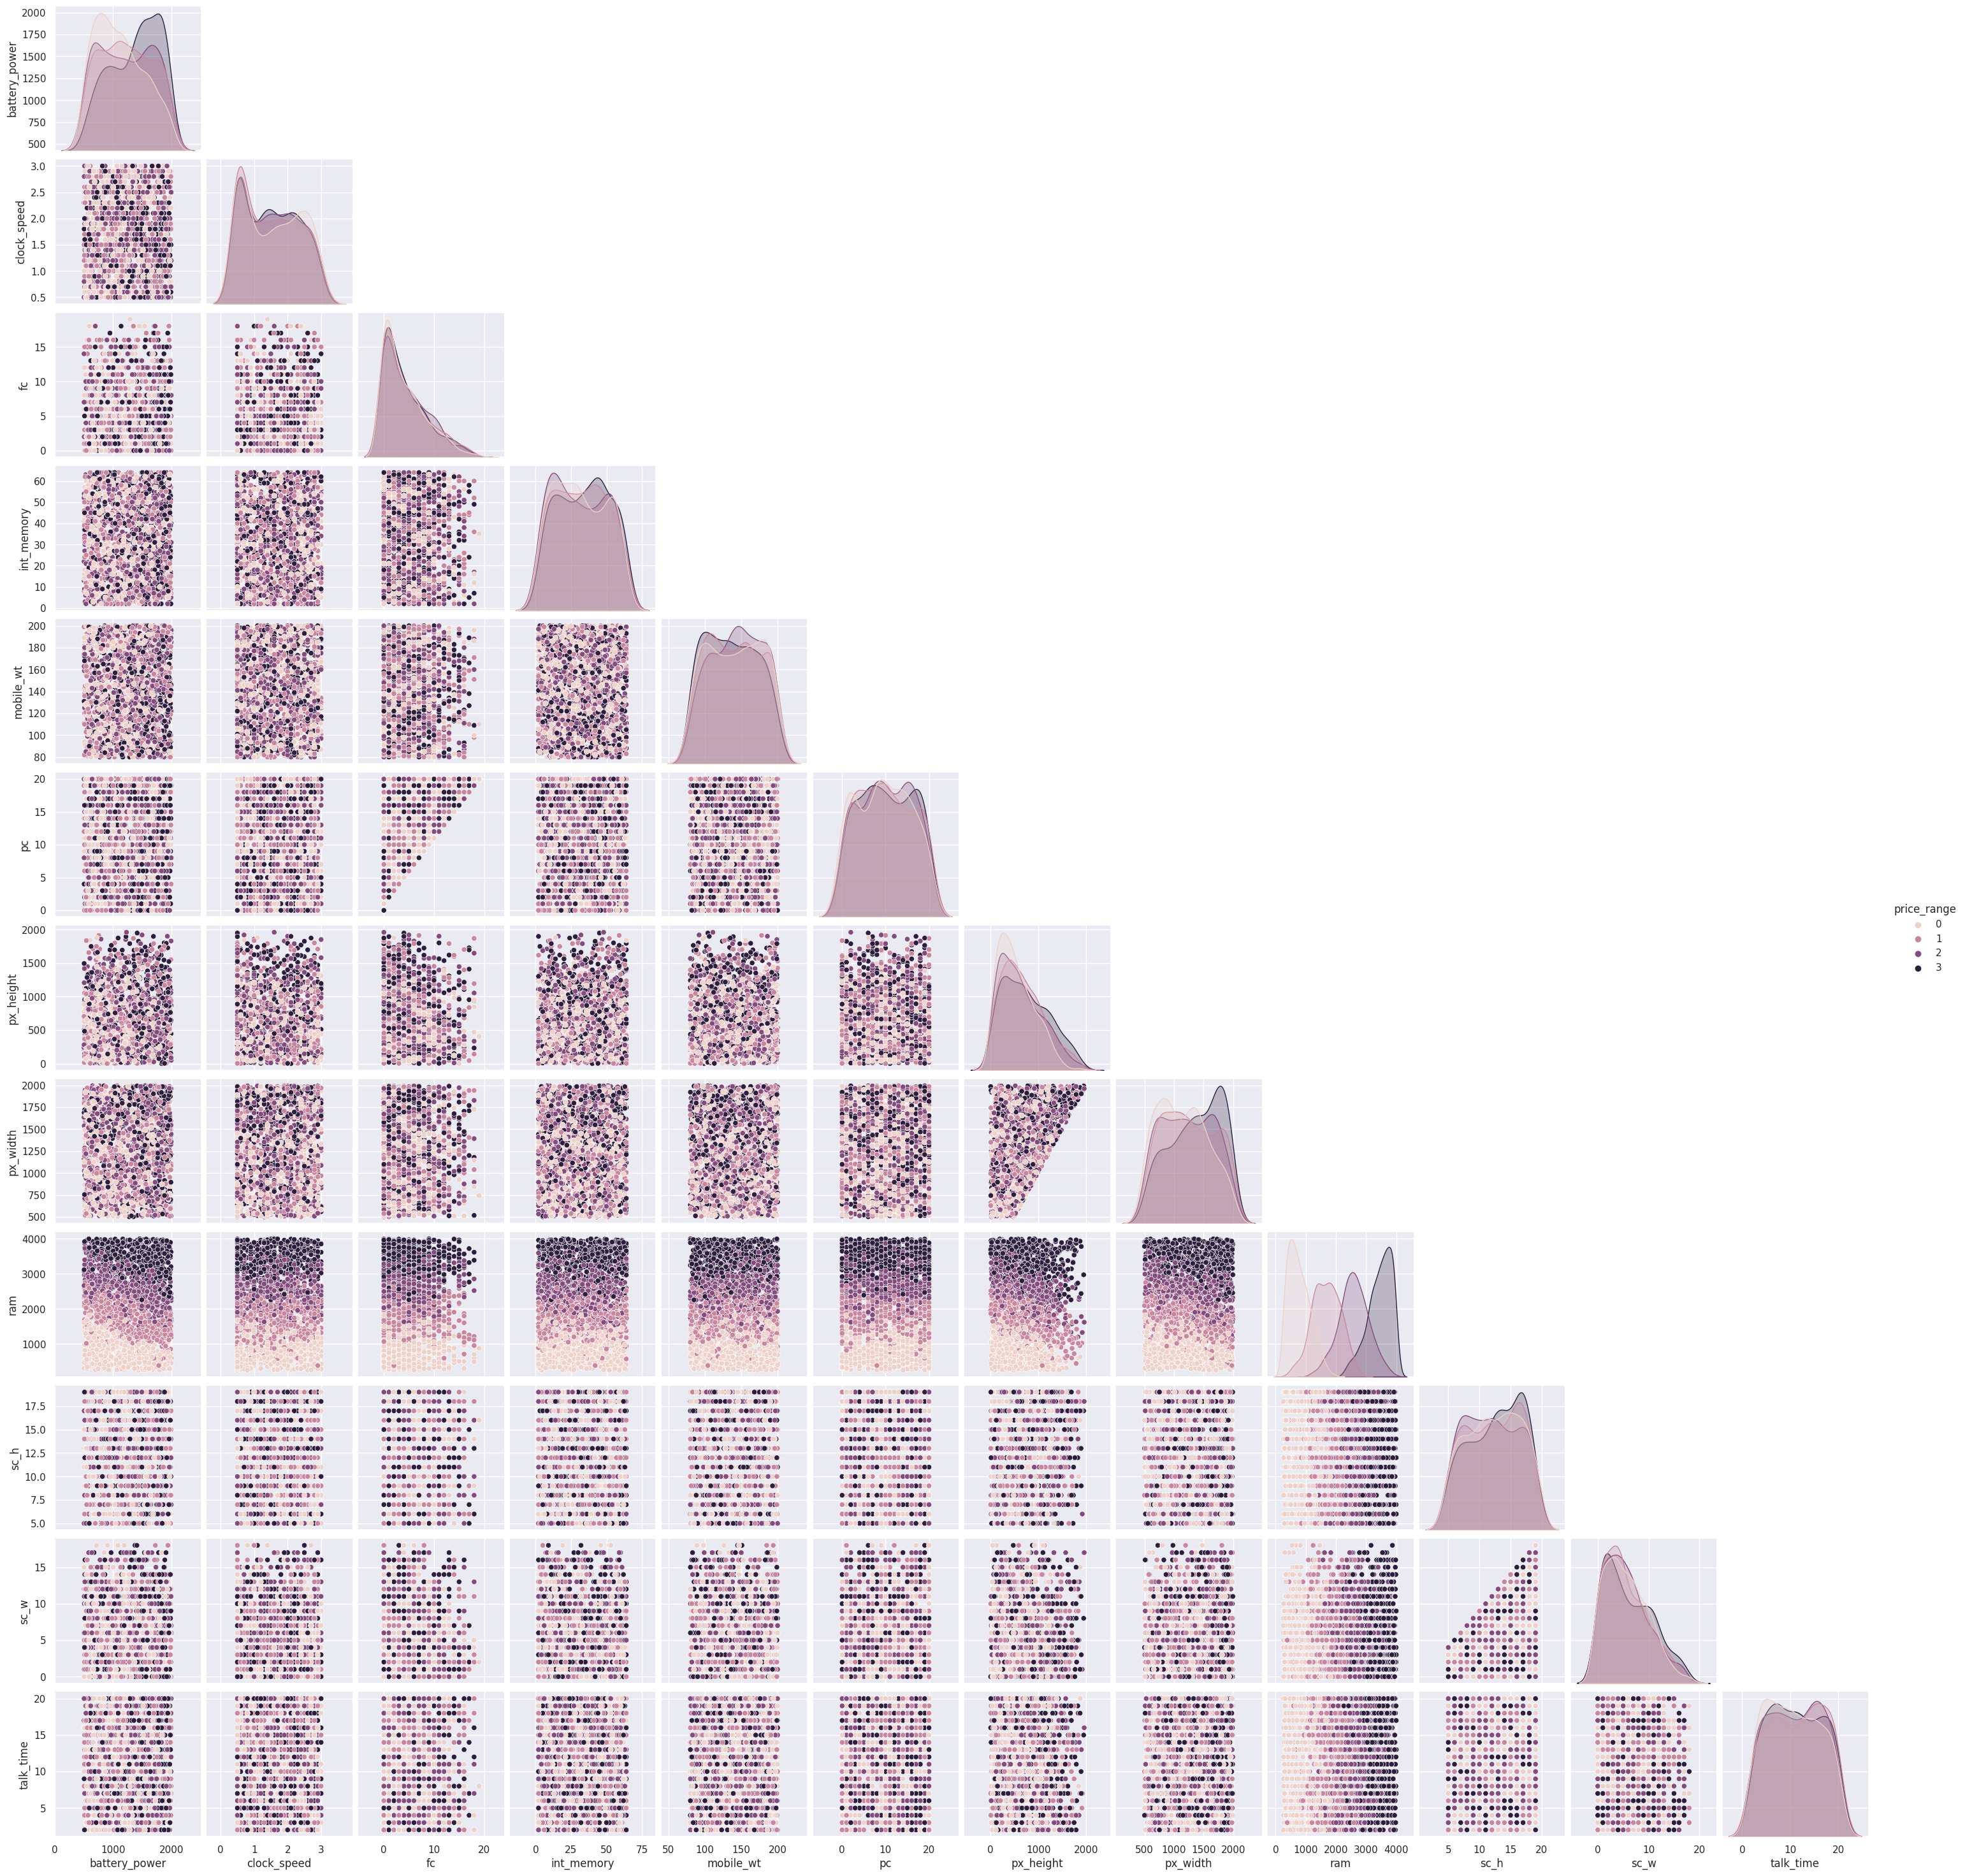

In [ ]:
pair = sns.pairplot(data=df_train,
                    vars=numerical_cols,
                    hue='price_range')
pair.map_upper(ocultar_ejes);

# Aumento de variables
---


Como podemos ver el dataset original tiene 21 columnas o variables.

In [ ]:
print(f'Variables del dataset original: {df_train.shape[1]}')

Variables del dataset original: 21


La primera variable que voy a crear es **aspect_ratio** que es la relación de aspecto de celular.

In [ ]:
df_train['aspect_ratio'] = df_train['px_width'] / df_train['px_height']


La segunda variable será **speed_per_core** que determina la velocidad del reloj unitaria por cada núcleo.

In [ ]:
df_train['speed_per_core'] = df_train['clock_speed'] / df_train['n_cores']

La tercera variable será **all_functions** que determina se un celular tiene todas las funcionalidades principales.

In [ ]:
all_functions : list = []
for index, row in df_train.iterrows():
  if (row['dual_sim'] == 1) and (row['four_g'] == 1) and (row['three_g'] == 1) and (row['wifi'] == 1):
    all_functions.append(1)
  else:
    all_functions.append(0)
df_train['all_functions'] = all_functions

El dataset original contiene 3 variables nuevas.

In [ ]:
print(f'Variables del dataset aumentado: {df_train.shape[1]}')

Variables del dataset aumentado: 24


 # PCA
 ---
 **resumen:**

 PCA (Principal Component Analysis) es un algoritmo de aprendizaje no supervisado utilizado para reducir la dimensionalidad de un conjunto de datos. Su objetivo principal es encontrar una representación más compacta de los datos, conservando la mayor cantidad posible de información relevante.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
X_PCA = df_train[categorical_cols]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

In [ ]:
pca = PCA(n_components=len(categorical_cols)-1)
X_pca = pca.fit_transform(X_scaled)

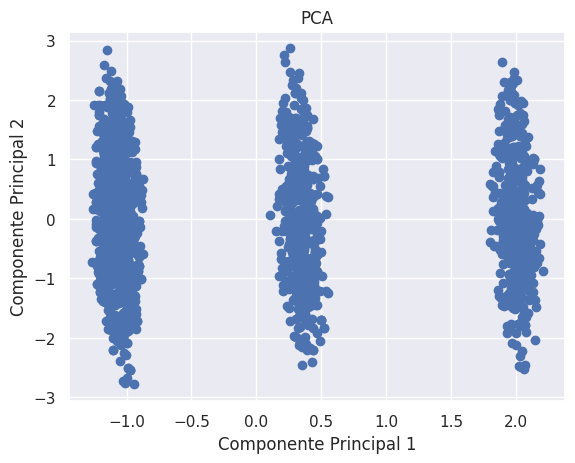

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

# Modelos ML (Usando conjunto de datos con dimensionalidad reducida)
---
Se puede notar como la precisión de los modelos mejoraron significativamente.

Función para el trade off.

Para un algoritmo de SVM no se puede calcular directamente el trade off entre sesgo y varianza.

In [ ]:
from sklearn.metrics import mean_squared_error

def variance(predictions) -> None:
  unique_labels = np.unique(predictions)
  num_classes = len(unique_labels)
  if num_classes > 1:
      print("El modelo tiene alta varianza debido a la presencia de múltiples clases.")
  else:
      print("El modelo tiene sesgo ya que solo se encontró una única clase.")

def metricas(y_test_, y_pred_) -> None:
  accuracy = accuracy_score(y_test_, y_pred_)

  mse = mean_squared_error(y_test_, y_pred_)
  variance = mse
  bias = 1 - accuracy
  print("Error cuadrático medio:", mse)
  print("Varianza:", variance)
  print("Sesgo:", bias)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

## Clasificación con arbol de desición.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df_tree = df_train[categorical_cols]
X = X_pca
y = df_tree['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
model = Pipeline([
    ('tree_model', DecisionTreeClassifier(random_state=0))
])

model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

In [ ]:
print(f'Presición del modelo: {round(accuracy_score(y_test, y_prediction)*100, 2)}%')
print(f'F1: {round(f1_score(y_test, y_prediction, average="macro")*100, 2)}%')

Presición del modelo: 75.5%
F1: 75.1%


In [ ]:
metricas(y_test, y_prediction)

Error cuadrático medio: 0.245
Varianza: 0.245
Sesgo: 0.245


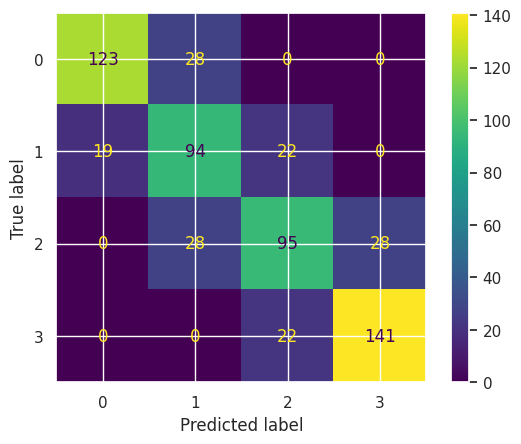

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_prediction,
                                        labels=model.named_steps['tree_model'].classes_);

## Clasificación con random forest.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Parámetros necesarios para la búsqueda aleatoria.
parameters : dict = {
    'n_estimators' : [15, 50, 150, 200, 500],
    'criterion' : ['gini',
                   'entropy'],
    'min_samples_leaf' : [1, 5, 10],
    'max_depth' : [None, 5, 10, 50],
    'max_leaf_nodes' : [None, 31, 100],
    'bootstrap' : [True, False]
}
model_rf = RandomForestClassifier()

In [ ]:
search = RandomizedSearchCV(model_rf,
                            parameters,
                            cv=5,
                            n_iter=10,
                            n_jobs=-1,
                            random_state=0)
search.fit(X_train, y_train);

In [ ]:
y_prediction = search.predict(X_test)

In [ ]:
print(f'Presición del modelo: {round(accuracy_score(y_test, y_prediction), 2)*100}%')

Presición del modelo: 91.0%


In [ ]:
metricas(y_test, y_prediction)

Error cuadrático medio: 0.09166666666666666
Varianza: 0.09166666666666666
Sesgo: 0.09166666666666667


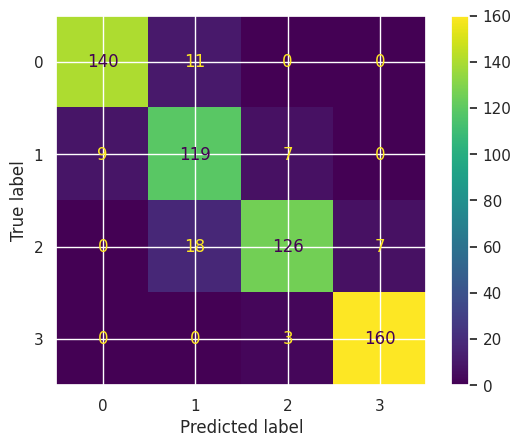

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_prediction,
                                        labels=search.classes_);

## Clasificación con SVM

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data_svm = df_train
data_svm_x = X_pca
data_svm_y = data_svm['price_range']

X_train, X_test, y_train, y_test = train_test_split(data_svm_x,
                                                    data_svm_y,
                                                    test_size=0.2,
                                                    random_state=42)

svm = SVC(kernel='linear', probability=True, max_iter=-1)
svm.fit(X_train, y_train);

Calculo la precisión del modelo.

In [ ]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {round(accuracy*100, 2)}%')

Precisión: 100.0%


In [ ]:
variance(y_pred)

El modelo tiene alta varianza debido a la presencia de múltiples clases.
